In [32]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(10)

In [33]:
(X_img_train, y_label_train),(X_img_test, y_label_test) = cifar10.load_data()

print(x_img_train.shape)

label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

(50000, 32, 32, 3)


In [34]:
def plot_images(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap="binary")
        title = str(i)+","+label_dict[labels[i][0]]
        
        if len(prediction) > 0:
            title += '=>'+ label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

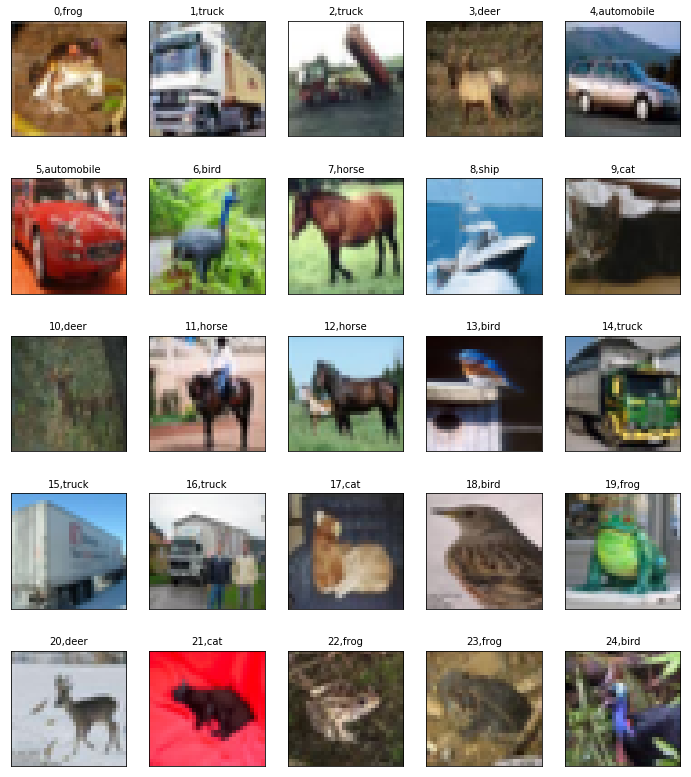

In [35]:
plot_images(X_img_train,y_label_train,[],idx =0, num =30)

In [36]:
X_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [37]:
X_img_train_normalize = X_img_train.astype("float32") / 255
X_img_test_normalize = X_img_test.astype("float32") / 255

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [38]:
y_label_test_OneHot.shape

(10000, 10)

In [66]:
model = Sequential()
### 第一卷積層
model.add(Conv2D(filters=32,
                 kernel_size = (3, 3),
                 input_shape = (32, 32, 3),
                 activation = "relu",
                 padding = "same"))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters=32,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 第二卷積層
model.add(Conv2D(filters=64,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same"))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters=64,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 第三卷積層
model.add(Conv2D(filters=128,
                 kernel_size = (3, 3),
                 activation = "relu",
                 padding = "same"))
model.add(Dropout(rate = 0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

### Flatten
model.add(Flatten())
model.add(Dropout(rate = 0.3))

### 第一隱藏層
model.add(Dense(units=2500, activation="relu"))
model.add(Dropout(0.3))
### 第二隱藏層
model.add(Dense(units=1500, activation="relu"))
model.add(Dropout(0.3))
### 輸出層
model.add(Dense(units=10, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [67]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(x=X_img_train_normalize, 
                    y=y_label_train_OneHot, 
                    batch_size= 300, 
                    epochs=10, 
                    verbose=1, 
                    validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 215s 5ms/step - loss: 1.9022 - acc: 0.2945 - val_loss: 1.8069 - val_acc: 0.3674
Epoch 2/10
40000/40000 [==============================] - 221s 6ms/step - loss: 1.4637 - acc: 0.4639 - val_loss: 1.6121 - val_acc: 0.4269
Epoch 3/10
40000/40000 [==============================] - 217s 5ms/step - loss: 1.2807 - acc: 0.5364 - val_loss: 1.3436 - val_acc: 0.5342
Epoch 4/10
40000/40000 [==============================] - 225s 6ms/step - loss: 1.1441 - acc: 0.5880 - val_loss: 1.0855 - val_acc: 0.6310
Epoch 5/10
40000/40000 [==============================] - 225s 6ms/step - loss: 1.0430 - acc: 0.6281 - val_loss: 1.1312 - val_acc: 0.6062
Epoch 6/10
40000/40000 [==============================] - 227s 6ms/step - loss: 0.9520 - acc: 0.6609 - val_loss: 1.0454 - val_acc: 0.6426
Epoch 7/10
40000/40000 [==============================] - 227s 6ms/step - loss: 0.8803 - acc: 0.6886 - val_loss: 0.8656 - 

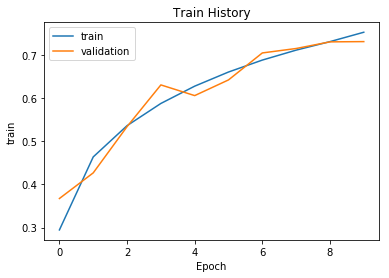

In [68]:
def show_train_history(history,acc,val_acc):
    plt.plot(history.history[acc])
    plt.plot(history.history[val_acc])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
    
show_train_history(history,'acc','val_acc')

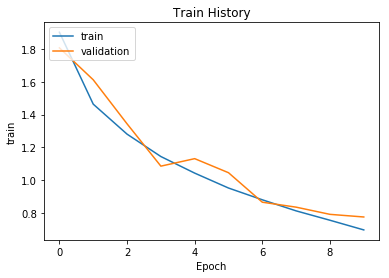

In [69]:
show_train_history(history,'loss','val_loss')

In [70]:
scores = model.evaluate(X_img_test_normalize, y_label_test_OneHot, verbose = 0)
scores[1]

0.7298

In [58]:
prediction = model.predict_classes(X_img_test_normalize)
prediction

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

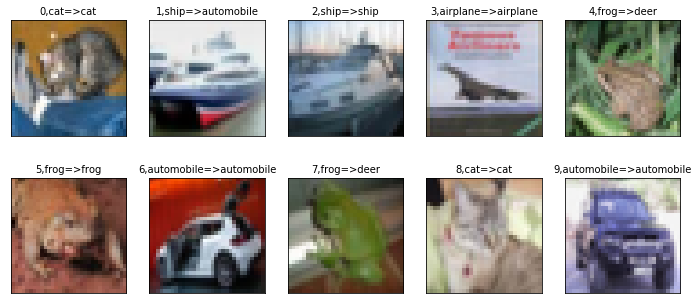

In [59]:
plot_images(X_img_test, y_label_test, prediction, 0, 10)

In [60]:
prediction_probability = model.predict(X_img_test_normalize)

In [61]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
prediction_probability[0]

array([ 0.08318836,  0.01801238,  0.06502501,  0.42882124,  0.0466781 ,
        0.19945347,  0.04948884,  0.02385579,  0.06106986,  0.02440685], dtype=float32)

In [65]:
### reshape(-1) <-- 把矩陣拉平
pd.crosstab(y_label_test.reshape(-1),prediction, rownames =["label"], colnames=["prediction"])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,772,24,19,14,11,5,8,15,73,59
1,10,823,6,10,1,3,5,7,24,111
2,102,11,429,97,124,81,53,70,18,15
3,27,16,36,503,69,162,62,65,23,37
4,39,9,36,82,627,31,33,123,15,5
5,19,5,22,176,56,584,19,89,17,13
6,9,15,32,81,61,25,724,24,13,16
7,12,8,15,43,48,48,5,798,3,20
8,72,58,6,12,3,5,1,10,788,45
